# K8

Concentrations used:

Idx - [IPTG]

C1 - 0.1 mM

C2 - 0.2 mM

C3 - 0.4 mM

C4 - 0.5 mM

C5 - 0.8 mM

In [72]:
%matplotlib inline

import sys
sys.path.insert(0, '../../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )


ColumnNames = {
    'A' : "-control",
    'B' : "+control",
    'C' : "-IPTG -Glic",
    'D' : "-IPTG 0.2Glic",
    'E' : "-IPTG 0.4Glic",
    'F' : "0.01IPTG -Glic",
    'G' : "0.1IPTG -Glic",
    'H' : "LB",
}


MeaningColNames = { v: k for k, v in ColumnNames.items()}

def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [86]:
FLlist = []
tidx = []

for file in glob.glob("REK8 fluo*.txt"):
    tidx.append( float( file.split(' ')[2].split('.')[0] ) )
    FLlist.append(file)

Idx = np.argsort(tidx)
FLlist = np.array(FLlist)[Idx]

ODlist = []
for j in range(0,10):
    ODlist.append("REK8 OD "+str(j)+".txt")

Now reading all the data...

In [90]:
fldata = {}
fldata = LabLib.ReadFluor_timefmt_nanomed(FLlist)

Showing some of the data...

In [91]:
fldata[allCols('-control')]

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,5353814,5326644,5022343,4801931,4769621,4524041,5304582,5344448,5357396
1,5985503,5869590,5663380,5430244,5463556,5213868,5939640,5937866,5987047
2,6042453,6206369,6113366,6043790,6109140,5995606,6269454,6392384,6387058
3,5560935,5979644,6400147,6488170,6527514,6538646,6211203,6176518,6242490
4,4573543,5326185,5878522,6273852,6583152,6691122,5606645,5772552,5674769
5,3817271,4553898,5208290,5660806,5986595,6415308,4887626,4987888,4925158
6,3155775,3871497,4498082,4969428,5297310,5667400,4250896,4189227,4032942
7,1662261,2254673,2782276,3167543,3404404,3782421,2888951,2607014,2439525
8,1166013,1685914,2201240,2609206,2793779,3140304,2368318,2109340,1909702


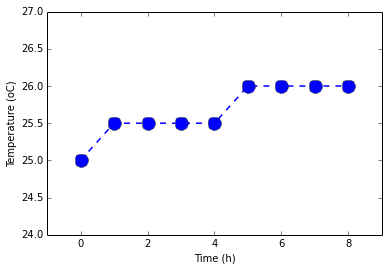

In [95]:
pl.plot(fldata['T(oC)'], 'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2))

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Temperature (oC)')
pl.ylim(24.,27.)
pl.show()

Temperature seems quite reasonable accross different boards.

### OD measurements

In [96]:
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)
oddata[allCols('-control')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,0.1806,0.1838,0.2019,0.1937,0.1852,0.1883,0.1853,0.1745,0.1840
1,0.2061,0.2045,0.2200,0.2081,0.1980,0.2035,0.2015,0.1939,0.2006
2,0.2417,0.2246,0.2330,0.2235,0.2152,0.2239,0.2206,0.2138,0.2206


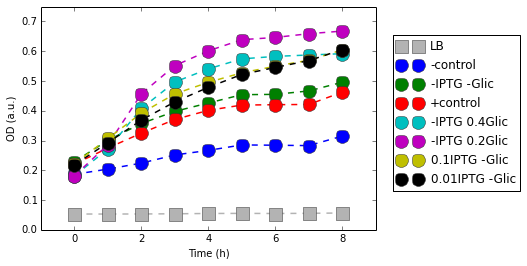

In [103]:
pl.plot(np.mean(np.array(oddata[allCols('LB')]), axis=1), 
            's--', color=(0.7,0.7,0.7), lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label='LB')

for CASE in ColumnNames.values()[:-1]:
    pl.plot(np.mean(np.array(oddata[allCols(CASE)]), axis=1), 
            'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label=CASE)

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('OD (a.u.)')
pl.ylim(0.0,0.75)
pl.legend(bbox_to_anchor=(1.45, 0.9))
pl.show()
pl.show()

### Baselines: -control and NoPlasmid

In [109]:
NormdOD = {}
for CASE in ColumnNames.values():
    NormdOD[CASE] = np.array(fldata[allCols(CASE)])/np.array(oddata[allCols(CASE)])

As expected, we see no significant differences (still got to do a statistical test!).

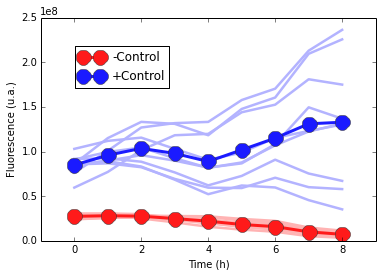

In [132]:
pl.plot(NormdOD['-control'], color=(1.0,0.7,0.7), lw=2.5)
pl.plot( np.mean(NormdOD['-control'], axis=1), 
        'o-', lw=3., markersize=15., color=(1.0,0.1,0.1), markeredgecolor=(0.2,0.2,0.2), label="-Control")

pl.plot(NormdOD['+control'], color=(0.7,0.7,1.0), lw=2.5)
pl.plot( np.mean(NormdOD['+control'], axis=1), 
        'o-', lw=3., markersize=15., color=(0.1,0.1,1.0), markeredgecolor=(0.2,0.2,0.2), label="+Control")

pl.xlim(-1,9)
pl.legend()
pl.ylabel('Fluorescence (u.a.)')
pl.xlabel('Time (h)')
pl.legend(bbox_to_anchor=(0.4, 0.9))
pl.show()

Just to have an idea of the order of the fluorescence differences, let's evaluate the average difference between Arabinose and Rhamnose.

### Quick check on the zero-concentration data


Next, let's see how is the zero-concentration evolving.

Not induced normalized by -control


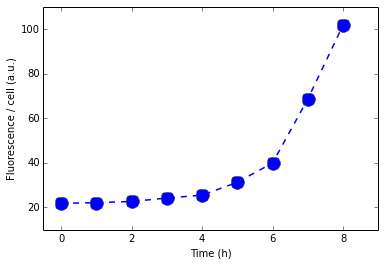

In [128]:
print 'Not induced normalized by -control'

ZeroLevel = np.mean(NormdOD['-IPTG -Glic'] / NormdOD['-control'], axis=1)
pl.plot(ZeroLevel, 'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2) )

pl.xlabel('Time (h)')
pl.xlim(-0.5,9)
pl.ylabel('Fluorescence / cell (a.u.)')
pl.ylim(10,110)
pl.legend(bbox_to_anchor=(0.7, 0.9))
pl.show()

### Preparing and normalizing promoter data

Next, let's plot the time evolution of each concentration

In [129]:
ColumnNames.values()

['-control',
 '-IPTG -Glic',
 '+control',
 '-IPTG 0.4Glic',
 '-IPTG 0.2Glic',
 '0.1IPTG -Glic',
 '0.01IPTG -Glic',
 'LB']

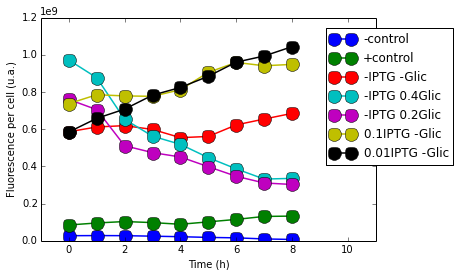

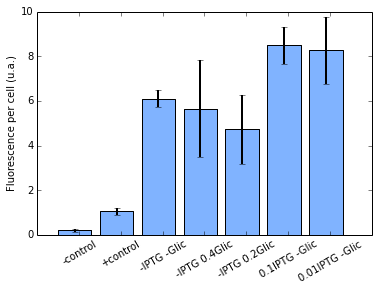

In [ ]:
mds = []
stds = []

CASES = ['-control','+control','-IPTG -Glic',
         '-IPTG 0.4Glic','-IPTG 0.2Glic','0.1IPTG -Glic','0.01IPTG -Glic']

for j in CASES:
    Cj_ts = np.mean(NormdOD[j], axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    stds.append( Cj_ts.std() )
    
pl.xlim(-1,11)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(1.25, 0.98))
pl.show()


mds = np.array(mds) / 10e7
stds = np.array(stds) / 10e7

error_config = {'ecolor': '0.', 'width': 10.0, 'linewidth' : 2.}

pl.bar(np.array(range(7)) - 0.5, mds, yerr=stds, error_kw=error_config, color=(0.5,0.7,1.0))
pl.xlabel('')
pl.xticks(np.arange(0,8), CASES, 
         rotation=30)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

To have an idea of how strong the GFP signal is, let's compare it with the zero-level.

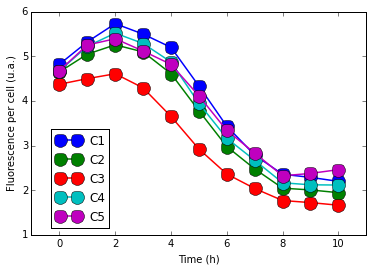

In [15]:
mds = []
for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
    Cj_ts = np.mean(np.array(fldata[allCols(j)]), axis=1) \
        / np.mean(np.array( oddata[ODorganization[j]] )[:11], axis=1) / ZeroLevel
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,11)
pl.xlabel('Time (h)')
pl.ylim(1.,6.0)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.25, 0.5))
pl.show()